In [2]:
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam
import keras

from settings import *

from utils.general import clean_session, plot_model, split_dataset, scale_dataset, shape_dataset, print_dataset_info
from utils.models.ocr import save_model

In [3]:
import Datasets.OCR.CNN_Letters.loader as CNN_Letters
import Datasets.OCR.manual.loader as manual
import Datasets.OCR.EnglishFnt.loader as EnglishFnt

In [4]:
# clean_session()

In [5]:
def create_model():
    model = Sequential()

    # CNN
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu',input_shape=INPUT_SHAPE))
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))

    # Pooling
    model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='same'))

    # Drop some data points randomly (mainly for caligraphy reasons)
    model.add(Dropout(0.25))

    # Flattening before feeding to FCNN
    model.add(Flatten())

    # FCNN
    # use softmax since we are doing classification (1 node for each possible output)
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(len(COMBINED_CHARS), activation='softmax'))

    model.summary()

    return model


In [6]:
def train_model(model, learning_rate, batch_size, epochs, patience):
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(loss=categorical_crossentropy, optimizer=optimizer, metrics=['accuracy'])

    callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss', patience=patience, restore_best_weights=True, verbose=1)]

    CX_data, CY_data = CNN_Letters.load_dataset()
    MX_data, MY_data = manual.load_dataset()
    X_data = np.concatenate((CX_data, MX_data))
    Y_data = np.concatenate((CY_data, MY_data))

    X_train, X_test, Y_train, Y_test = split_dataset(X_data, Y_data, test_percent=TEST_PERCENT, random_state=RANDOM_STATE, shuffle=True)
    X_train, X_test = shape_dataset(X_train, X_test, input_shape=INPUT_SHAPE)
    X_train, X_test = scale_dataset(X_train, X_test, batch_size=batch_size)

    print_dataset_info(X_data, X_train, Y_train, X_test, Y_test)

    history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, validation_split=VALIDATION_PERCENT, callbacks=callbacks)

    return history

2024-03-25 02:31:55.482409: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-25 02:31:55.608902: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-25 02:31:55.609892: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 48, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 96, 46, 64)        18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 94, 44, 128)       73856     
                                                                 
 max_pooling2d (MaxPooling2  (None, 47, 22, 128)       0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 47, 22, 128)       0         
                                                                 
 flatten (Flatten)           (None, 132352)            0         
                                                        

Loading CNN_Letters:   0%|          | 0/35 [00:00<?, ?it/s]

Loading 0:   0%|          | 0/1030 [00:00<?, ?it/s]

Loading 1:   0%|          | 0/1030 [00:00<?, ?it/s]

Loading 2:   0%|          | 0/1030 [00:00<?, ?it/s]

Loading 3:   0%|          | 0/1030 [00:00<?, ?it/s]

Loading 4:   0%|          | 0/1030 [00:00<?, ?it/s]

Loading 5:   0%|          | 0/1030 [00:00<?, ?it/s]

Loading 6:   0%|          | 0/1030 [00:00<?, ?it/s]

Loading 7:   0%|          | 0/1030 [00:00<?, ?it/s]

Loading 8:   0%|          | 0/1030 [00:00<?, ?it/s]

Loading 9:   0%|          | 0/1030 [00:00<?, ?it/s]

Loading A:   0%|          | 0/1010 [00:00<?, ?it/s]

Loading B:   0%|          | 0/1030 [00:00<?, ?it/s]

Loading C:   0%|          | 0/1020 [00:00<?, ?it/s]

Loading D:   0%|          | 0/1010 [00:00<?, ?it/s]

Loading E:   0%|          | 0/1010 [00:00<?, ?it/s]

Loading F:   0%|          | 0/1020 [00:00<?, ?it/s]

Loading G:   0%|          | 0/1020 [00:00<?, ?it/s]

Loading H:   0%|          | 0/1020 [00:00<?, ?it/s]

Loading I:   0%|          | 0/1010 [00:00<?, ?it/s]

Loading J:   0%|          | 0/1030 [00:00<?, ?it/s]

Loading K:   0%|          | 0/1010 [00:00<?, ?it/s]

Loading L:   0%|          | 0/1010 [00:00<?, ?it/s]

Loading M:   0%|          | 0/1020 [00:00<?, ?it/s]

Loading N:   0%|          | 0/1020 [00:00<?, ?it/s]

Loading P:   0%|          | 0/1010 [00:00<?, ?it/s]

Loading Q:   0%|          | 0/1010 [00:00<?, ?it/s]

Loading R:   0%|          | 0/1020 [00:00<?, ?it/s]

Loading S:   0%|          | 0/1020 [00:00<?, ?it/s]

Loading T:   0%|          | 0/1020 [00:00<?, ?it/s]

Loading U:   0%|          | 0/1010 [00:00<?, ?it/s]

Loading V:   0%|          | 0/1030 [00:00<?, ?it/s]

Loading W:   0%|          | 0/1010 [00:00<?, ?it/s]

Loading X:   0%|          | 0/1010 [00:00<?, ?it/s]

Loading Y:   0%|          | 0/1010 [00:00<?, ?it/s]

Loading Z:   0%|          | 0/810 [00:00<?, ?it/s]

Loading manual:   0%|          | 0/35 [00:00<?, ?it/s]

Loading 0:   0%|          | 0/30 [00:00<?, ?it/s]

Loading 1:   0%|          | 0/30 [00:00<?, ?it/s]

Loading 2:   0%|          | 0/30 [00:00<?, ?it/s]

Loading 3:   0%|          | 0/30 [00:00<?, ?it/s]

Loading 4:   0%|          | 0/30 [00:00<?, ?it/s]

Loading 5:   0%|          | 0/30 [00:00<?, ?it/s]

Loading 6:   0%|          | 0/30 [00:00<?, ?it/s]

Loading 7:   0%|          | 0/30 [00:00<?, ?it/s]

Loading 8:   0%|          | 0/30 [00:00<?, ?it/s]

Loading 9:   0%|          | 0/30 [00:00<?, ?it/s]

Loading A:   0%|          | 0/30 [00:00<?, ?it/s]

Loading B:   0%|          | 0/30 [00:00<?, ?it/s]

Loading C:   0%|          | 0/30 [00:00<?, ?it/s]

Loading D:   0%|          | 0/30 [00:00<?, ?it/s]

Loading E:   0%|          | 0/30 [00:00<?, ?it/s]

Loading F:   0%|          | 0/30 [00:00<?, ?it/s]

Loading G:   0%|          | 0/30 [00:00<?, ?it/s]

Loading H:   0%|          | 0/30 [00:00<?, ?it/s]

Loading I:   0%|          | 0/30 [00:00<?, ?it/s]

Loading J:   0%|          | 0/30 [00:00<?, ?it/s]

Loading K:   0%|          | 0/30 [00:00<?, ?it/s]

Loading L:   0%|          | 0/30 [00:00<?, ?it/s]

Loading M:   0%|          | 0/30 [00:00<?, ?it/s]

Loading N:   0%|          | 0/30 [00:00<?, ?it/s]

Loading P:   0%|          | 0/30 [00:00<?, ?it/s]

Loading Q:   0%|          | 0/30 [00:00<?, ?it/s]

Loading R:   0%|          | 0/30 [00:00<?, ?it/s]

Loading S:   0%|          | 0/30 [00:00<?, ?it/s]

Loading T:   0%|          | 0/30 [00:00<?, ?it/s]

Loading U:   0%|          | 0/30 [00:00<?, ?it/s]

Loading V:   0%|          | 0/30 [00:00<?, ?it/s]

Loading W:   0%|          | 0/30 [00:00<?, ?it/s]

Loading X:   0%|          | 0/30 [00:00<?, ?it/s]

Loading Y:   0%|          | 0/30 [00:00<?, ?it/s]

Loading Z:   0%|          | 0/30 [00:00<?, ?it/s]

Data samples: 107550
X_train shape: 96795
Y_train shape: 96795
X_test shape: 10755
Y_test shape: 10755
Epoch 1/25


2024-03-25 02:33:21.407478: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
2024-03-25 02:33:24.969511: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8906
2024-03-25 02:33:25.447171: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-03-25 02:33:26.047416: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.03GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-03-25 02:33:26.229033: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.03GiB with 

605/605 [==============================] - 136s 167ms/step - loss: 0.5068 - accuracy: 0.8539 - val_loss: 0.0358 - val_accuracy: 0.9906
Epoch 2/25
605/605 [==============================] - 83s 137ms/step - loss: 0.0671 - accuracy: 0.9794 - val_loss: 0.0223 - val_accuracy: 0.9936
Epoch 3/25
605/605 [==============================] - 83s 137ms/step - loss: 0.0411 - accuracy: 0.9871 - val_loss: 0.0158 - val_accuracy: 0.9957
Epoch 4/25
605/605 [==============================] - 83s 137ms/step - loss: 0.0283 - accuracy: 0.9915 - val_loss: 0.0121 - val_accuracy: 0.9967
Epoch 5/25
605/605 [==============================] - 83s 137ms/step - loss: 0.0214 - accuracy: 0.9935 - val_loss: 0.0121 - val_accuracy: 0.9964
Epoch 6/25
605/605 [==============================] - 83s 137ms/step - loss: 0.0190 - accuracy: 0.9941 - val_loss: 0.0102 - val_accuracy: 0.9974
Epoch 7/25
605/605 [==============================] - 83s 136ms/step - loss: 0.0143 - accuracy: 0.9951 - val_loss: 0.0121 - val_accuracy: 0.

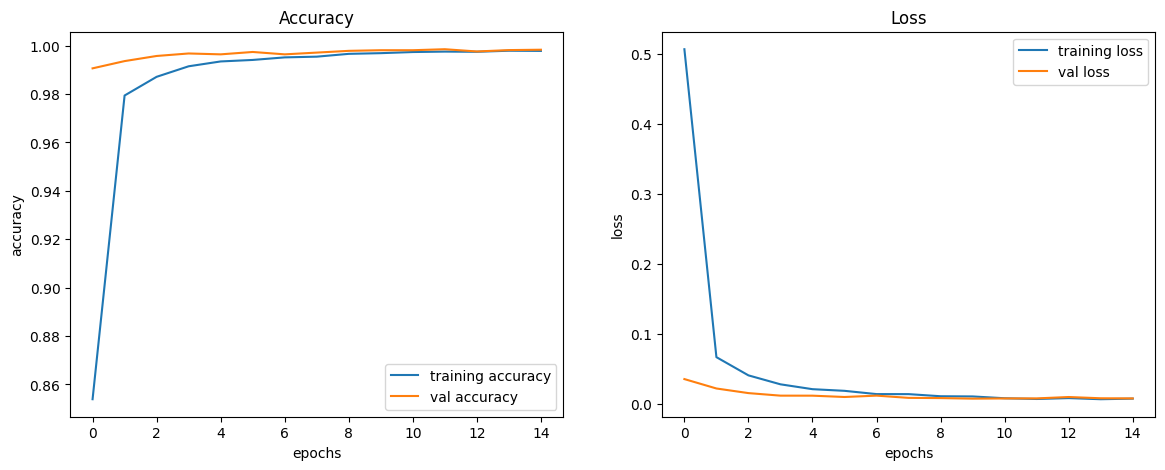

Saved model v3 to disk


: 

In [7]:
model = create_model()
history = train_model(model, learning_rate=0.001, batch_size=128, epochs=25, patience=5)
plot_model(history, version=3, save=True)
save_model(model, version=3)